<a href="https://colab.research.google.com/github/prashantghevde1/Pytorch/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model (nn.Module):
  def __init__(self, in_features =4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, out_features)

  def forward(self, x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)

    return(x)

In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df.head(100)

/tmp/ipython-input-1098155139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [7]:
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [10]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)>

In [13]:
epoch = 200
losses=[]
for i in range(epoch):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy()) # Detach and convert to numpy
  if i % 10 ==0:
    print(f'epoch: {i} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.125203251838684
epoch: 10 loss: 1.0097211599349976
epoch: 20 loss: 0.8162348866462708
epoch: 30 loss: 0.585993230342865
epoch: 40 loss: 0.4003389775753021
epoch: 50 loss: 0.26794716715812683
epoch: 60 loss: 0.1796349585056305
epoch: 70 loss: 0.12165624648332596
epoch: 80 loss: 0.08606516569852829
epoch: 90 loss: 0.06522615253925323
epoch: 100 loss: 0.05286873131990433
epoch: 110 loss: 0.04508010298013687
epoch: 120 loss: 0.03979312255978584
epoch: 130 loss: 0.03596429154276848
epoch: 140 loss: 0.03302798792719841
epoch: 150 loss: 0.030512521043419838
epoch: 160 loss: 0.027733495458960533
epoch: 170 loss: 0.024612072855234146
epoch: 180 loss: 0.021672405302524567
epoch: 190 loss: 0.019319692626595497


Text(0.5, 0, 'epoch')

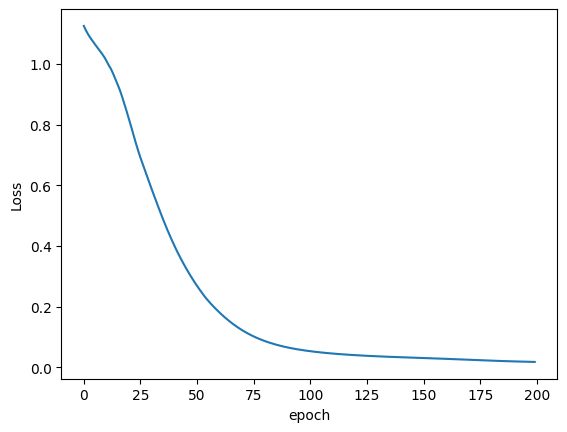

In [15]:
plt.plot(range(epoch),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [14]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [15]:
loss

tensor(0.1775)

In [16]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')


1.) tensor([-7.0837,  3.9382,  8.7369]) 	 2
2.) tensor([-9.8711,  1.7714, 15.9530]) 	 2
3.) tensor([-10.8324,   3.0169,  16.0902]) 	 2
4.) tensor([-3.9556,  7.8951, -1.1896]) 	 1
5.) tensor([-8.9619,  3.6067, 12.2663]) 	 2
6.) tensor([-2.1213,  8.5257, -5.1761]) 	 1
7.) tensor([-6.8943,  4.9857,  7.1661]) 	 2
8.) tensor([-3.8532,  8.0699, -1.5694]) 	 1
9.) tensor([-7.9053,  4.2998,  9.6757]) 	 2
10.) tensor([-10.5532,   1.8380,  17.0212]) 	 2
11.) tensor([-6.5110,  5.1470,  6.3427]) 	 2
12.) tensor([ 11.4623,   1.4096, -20.3331]) 	 0
13.) tensor([ 10.5285,   1.2517, -18.4669]) 	 0
14.) tensor([-0.5117,  6.7448, -5.8111]) 	 1
15.) tensor([  9.2710,   2.4325, -17.7526]) 	 0
16.) tensor([-6.0441,  5.7622,  4.8409]) 	 2
17.) tensor([ 10.3119,   1.5842, -18.5383]) 	 0
18.) tensor([-6.8873,  4.3156,  7.9690]) 	 1
19.) tensor([ 12.2259,   1.0172, -21.1442]) 	 0
20.) tensor([  8.8682,   1.9641, -16.4609]) 	 0
21.) tensor([-1.1310,  7.4374, -5.5753]) 	 1
22.) tensor([-9.9420,  2.7813, 14.8867])

In [17]:
my_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [18]:
with torch.no_grad():
  print(model(my_iris))

tensor([-7.2602,  3.9032,  9.0829])


In [19]:
torch.save(model.state_dict(), 'Iris_Model_state_dict.pt')

In [20]:
new_model=Model()
new_model.load_state_dict(torch.load('Iris_Model_state_dict.pt'))
new_model.eval() # Set the model to evaluation mode

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)